In [24]:
% ignore - internal setup
path('../scripts/refrig_line', path)
set(0, 'DefaultLineLineWidth', 2)
set(0, 'DefaultAxesFontSize', 14);

# Bracketing Methods (Bisection example)

Consider the refrigeration tank example from Belegundu and Chandrupatla [1].
We want to minimize the cost of a cylindrical refrigeration tank that must have
a volume of 50 m$^3$.
The costs of the tank are
- Circular ends cost \$10 per m$^2$
- Cylindrical walls cost \$6 per m$^2$
- Refrigerator costs \$80 per m$^2$ over its life

Let $d$ be the tank diameter, and $L$ the height.

\begin{align}
  f &= 10  \left(\frac{2 \pi d^2}{4}\right) + 6 (\pi d L) + 80 \left( \frac{2
\pi d^2}{4} + \pi d L \right)\\
  &= 45 \pi d^2 + 86 \pi d L
\end{align}

However, $L$ is a function of $d$ because the volume is constrained.  We could
add a constraint to the problem
\begin{align}
  \frac{\pi d^2}{4} L = V
\end{align}
but it is easier to express $V$ as a function of $d$ and make the problem
unconstrained.
\begin{align}
  L &= \frac{4 V}{\pi d^2}\\
  &= \frac{200}{\pi d^2}
\end{align}
Thus the optimization can be expressed as
\begin{align}
\textrm{minimize} &\quad 45 \pi d^2 + \frac{17200}{d}\\
\textrm{with respect to} &\quad d \\
\textrm{subject to} &\quad d \ge 0
\end{align}

One-dimensional optimization problems are silly of course, we can just find the
minimum by looking at a plot.  However, we use a one-dimensional example to
illustrate line searches.  A line search seeks an approximate minimum to a one-dimensional optimization problem within a N-dimensional space.

We will use bisection to find the minimum of this function.  This is a recursive
function.



In [ ]:
function [x, history] = bisection(x1, x2, f1, f2, fh, history)
%{
This function finds the minimum of a function using bisection.
It can also easily be used to find the root of a function, 
but for simplicity we've not added that second case.
Inputs:
    x1: lower bound
    x2: upper bound
    f1: function (or gradient) at lower bound
    f2: function (or gradient) at upper bound
        f1 * f2 must be < 0.  Currently left up to the user to check.
    fh: function handle.  should be of form [f, g] = fh(x)
        where f is the funciton value and g = df/dx
    history: input an empty array and the iteration history for the
             mean value of x will be appended at each iteration
Outputs:
    x: new value for x
    history: appended history array
%}

% new point at midpoint
x = 0.5*(x1 + x2);

% save iteration history
history = [history, x];

% check for convergence
if (abs(x1 - x2) < 1e-6)  % simplistic check
    return;
end

% evaluate function at new point
% change to [f, ~] = fh(x) to make this a root solver (and input function
% values instead of gradients
[~, f] = fh(x);   % get new gradient value

% determine which bracket to keep
if (f*f1 < 0)
    x2 = x;
    f2 = f;
else
    x1 = x;
    f1 = f;
end

% perform bisection on new bracket (recursive)
[x, history] = bisection(x1, x2, f1, f2, fh, history);

end

We are interseted in optimization, so we don't want to find the root of our
function, but rather the "root" of the derivative as a potential minimum point.
Let's define our objectve function, its derivative, and solve for the minium.

In [ ]:
function [f, g] = refrig(d)
%{
This function computes the cost of the cylindrical refrigeration tank
as a function of diameter.
Inputs:
    d: diameter (m)
Outputs:
    f: cost ($)
    g: gradient df/dd
%}

% function value
f = 45*pi*d.^2 + 17200./d;

% gradient
g = 90*pi*d - 17200./d.^2;

end

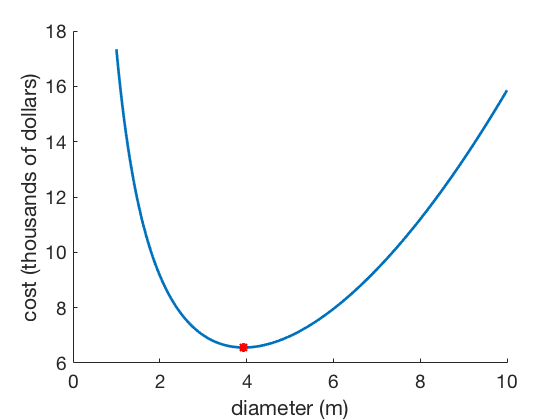

In [19]:
clear; close all;

% pick intial bracket on diameters
d1 = 1;
d2 = 10;

% evalaute function
[f1, g1] = refrig(d1);
[f2, g2] = refrig(d2);

% check that our bracket is ok
assert(g1*g2 < 0);

% find optimal point
dhist = [];
[dopt, dhist] = bisection(d1, d2, g1, g2, @refrig, dhist);

% plot function
dvec = linspace(d1, d2, 200);
figure(); hold on;
plot(dvec, refrig(dvec)/1e3);
plot(dopt, refrig(dopt)/1e3, 'r*');
xlabel('diameter (m)');
ylabel('cost (thousands of dollars)'); 

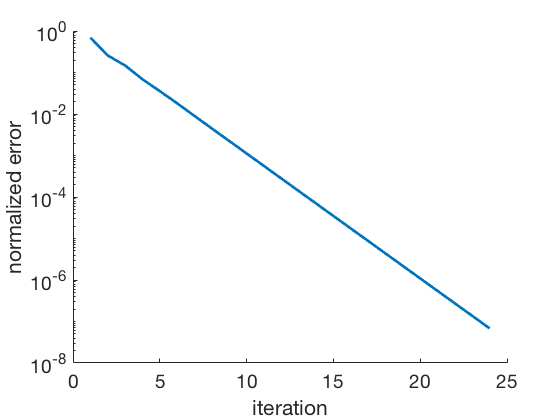

In [20]:
% plot convergence history
error = abs(dhist(1:end-1) - dhist(2:end))./(abs(dhist(2:end)));

figure();
semilogy(error);  % note use of semilog
xlabel('iteration');
ylabel('normalized error');
box('off')

Note the linear convergence behavior.

[1] Belegundu, A. D. and Chandrupatla, T. R., Optimization Concepts and Applications in Engineering, Cambridge University Press, Mar 2011.